32/32 [==============================] - 0s 1ms/step


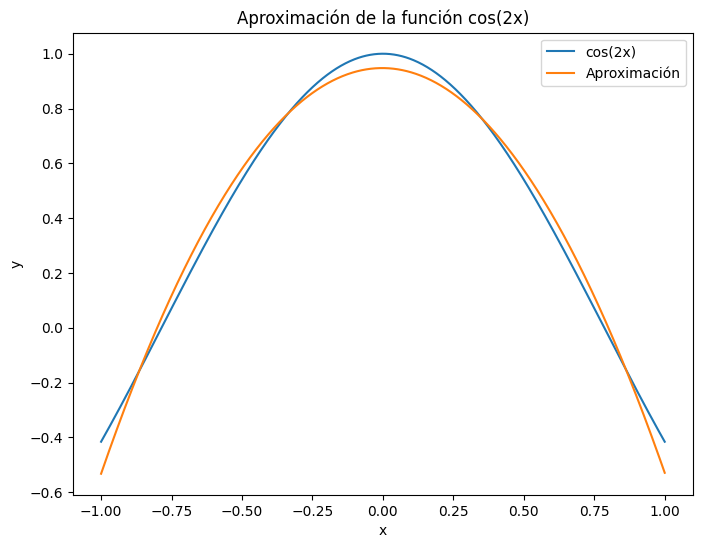

In [ ]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

# Definimos la capa personalizada para el polinomio de grado 3
class Polinomio(tf.keras.layers.Layer):
    def __init__(self):
        super(Polinomio, self).__init__() #Se hereda con super
        # Definiendo los coeficientes a0, a1, a2, a3 como parámetros entrenables
        self.a0 = tf.Variable(initial_value=tf.random.normal(shape=(1,), stddev=0.1), trainable=True)
        self.a1 = tf.Variable(initial_value=tf.random.normal(shape=(1,), stddev=0.1), trainable=True)
        self.a2 = tf.Variable(initial_value=tf.random.normal(shape=(1,), stddev=0.1), trainable=True)
        self.a3 = tf.Variable(initial_value=tf.random.normal(shape=(1,), stddev=0.1), trainable=True)

    def call(self, inputs):
        # Calculamos el valor del polinomio a partir de los coeficientes y la entrada x
        return self.a0 + self.a1 * inputs + self.a2 * inputs**2 + self.a3 * inputs**3

# Creando el modelo con la capa personalizada
model = tf.keras.Sequential([Polinomio()])

# Generar datos de entrenamiento
x_train = np.linspace(-1, 1, 100)
y_train = np.cos(2 * x_train)

# Se entrena el modelo
model.compile(optimizer='adam', loss='mean_squared_error')
history = model.fit(x_train, y_train, epochs=1000, verbose=0)

# Graficación
x_plot = np.linspace(-1, 1, 1000)
y_plot = np.cos(2 * x_plot)
y_pred = model.predict(x_plot)

plt.figure(figsize=(8, 6))
plt.plot(x_plot, y_plot, label='cos(2x)')
plt.plot(x_plot, y_pred, label='Aproximación')
plt.xlabel('x')
plt.ylabel('y')
plt.title('Aproximación de la función cos(2x)')
plt.legend()
plt.show()